In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [13]:
# Load data
filepath = "C:\\Users\\HP\\Desktop\\labs\\nnv_final_dmpa\\cleaned_data_2.csv"
df = pd.read_csv(filepath)
df.head()

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight
0,1700106,PLANT16,3,PORT09,V44_3,808,14.30
1,1700106,PLANT16,3,PORT09,V44_3,3188,87.94
2,1700106,PLANT16,3,PORT09,V44_3,2331,61.20
3,1700106,PLANT16,3,PORT09,V44_3,847,16.16
4,1700106,PLANT16,3,PORT09,V44_3,2163,52.34


In [14]:
# Select features for training
check_cols = ['Ship_ahead_day_count', 'Unit_quantity', 'Weight']
x_train = df[check_cols]

In [15]:
# Convert to numeric and handle missing values
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_train = x_train.dropna()
x_train.head()

,Ship_ahead_day_count,Unit_quantity,Weight
0,3,808,14.30
1,3,3188,87.94
2,3,2331,61.20
3,3,847,16.16
4,3,2163,52.34


In [16]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
clf = IsolationForest(n_jobs=100, random_state=42, contamination=0.05)
clf.fit(x_train_scaled)

# Predict anomalies
y_pred_train = clf.predict(x_train_scaled)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
pd.value_counts(y_pred_train)

 1    8754
-1     461
Name: count, dtype: int64

In [18]:
x_train.loc[y_pred_train==-1,:]

,Ship_ahead_day_count,Unit_quantity,Weight
21,3,2063,265.100000
22,3,2114,267.100000
23,3,2108,271.100000
77,3,2716,457.160000
78,3,1498,245.080000
...,...,...,...
8998,5,1237,67.479788
9000,5,2277,146.959575
9003,5,1800,106.719681
9011,5,1211,69.787645


In [19]:

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score
# Evaluate precision, recall, and F1 score (if you have true labels for anomalies)
true_labels = np.where(y_pred_train == -1, 1, 0)  # Use LOF predictions as true labels for simplicity
predicted_labels = np.where(y_pred_train == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score
precision = precision_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
recall = recall_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
f1 = f1_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
accuracy = accuracy_score(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[8754    0]
 [   0  461]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


In [20]:
# from sklearn.metrics import confusion_matrix, classification_report
# # Evaluate the model
# conf_matrix = confusion_matrix(np.ones(len(x_train)), y_pred_train)
# classification_rep = classification_report(np.ones(len(x_train)), y_pred_train, target_names=['Normal', 'Anomaly'])

# print("Confusion Matrix:")
# print(conf_matrix)

# print("\nClassification Report:")
# print(classification_rep)

from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
classification_rep = classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly'])
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[8754    0]
 [   0  461]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      8754
     Anomaly       1.00      1.00      1.00       461

    accuracy                           1.00      9215
   macro avg       1.00      1.00      1.00      9215
weighted avg       1.00      1.00      1.00      9215



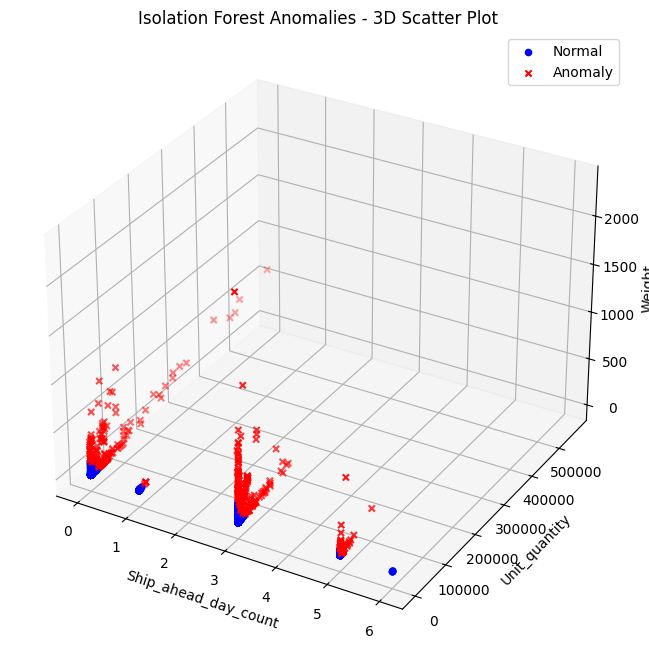

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have at least three features in your dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for normal instances (label 1)
ax.scatter(x_train.iloc[:, 0][y_pred_train == 1], x_train.iloc[:, 1][y_pred_train == 1], x_train.iloc[:, 2][y_pred_train == 1],
           c='blue', label='Normal', marker='o')

# Scatter plot for anomalies (label -1)
ax.scatter(x_train.iloc[:, 0][y_pred_train == -1], x_train.iloc[:, 1][y_pred_train == -1], x_train.iloc[:, 2][y_pred_train == -1],
           c='red', label='Anomaly', marker='x')

ax.set_xlabel('Ship_ahead_day_count')
ax.set_ylabel('Unit_quantity')
ax.set_zlabel('Weight')
ax.set_title('Isolation Forest Anomalies - 3D Scatter Plot')
ax.legend()
plt.show()


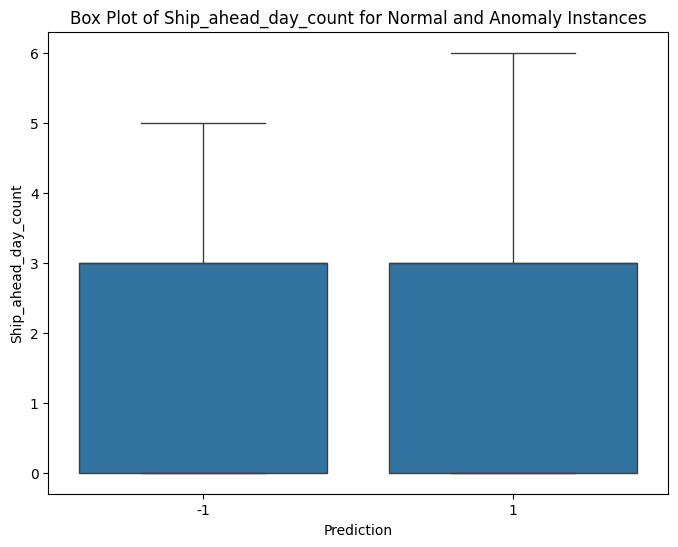

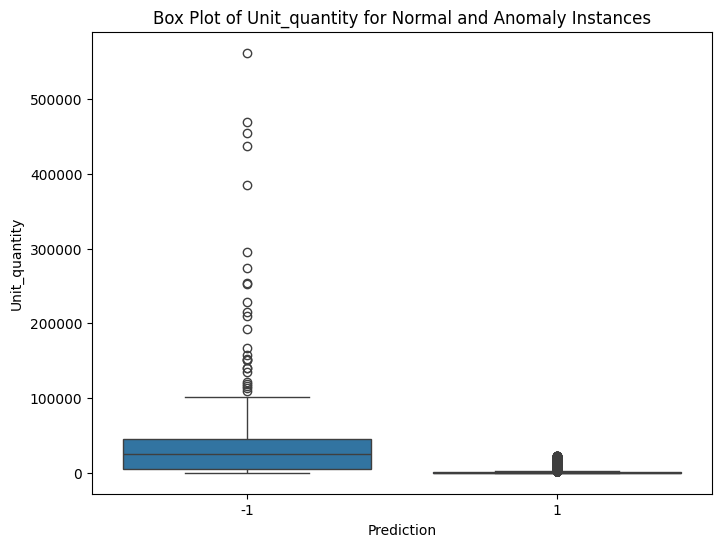

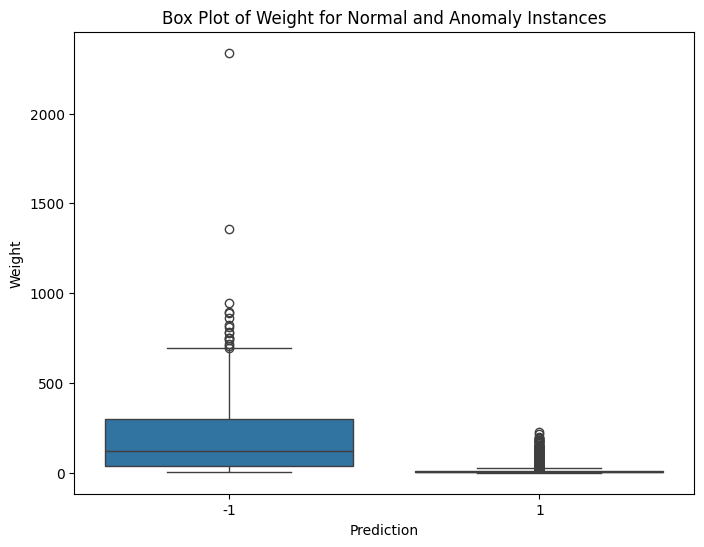

In [22]:
import seaborn as sns
# Box plots for each feature
for feature in x_train.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y_pred_train, y=x_train[feature])
    plt.xlabel('Prediction')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} for Normal and Anomaly Instances')
    plt.show()
